In [1]:
import numpy as np
import imageio as io
import scipy
from scipy import stats
from skimage import color
from skimage import filters
import matplotlib.pyplot as plt

In [2]:
def normalize(matrix, start, end):
    return (matrix - matrix.min())/(matrix.max() - matrix.min()) * (end-start) + start

In [3]:
# reference_name = 'montreal-bg.jpg'
reference_name = 'floresta.jpeg'

img_orig = ref_image = io.imread(reference_name)
img_orig_gs = color.rgb2gray(img_orig)
img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img_orig)
plt.subplot(122)
plt.imshow(img_orig_gs, cmap='gray')

FileNotFoundError: No such file: 'C:\Users\joaop\Documents\Projects\forest_image_segmentation\notebooks\floresta.jpeg'

<BarContainer object of 256 artists>

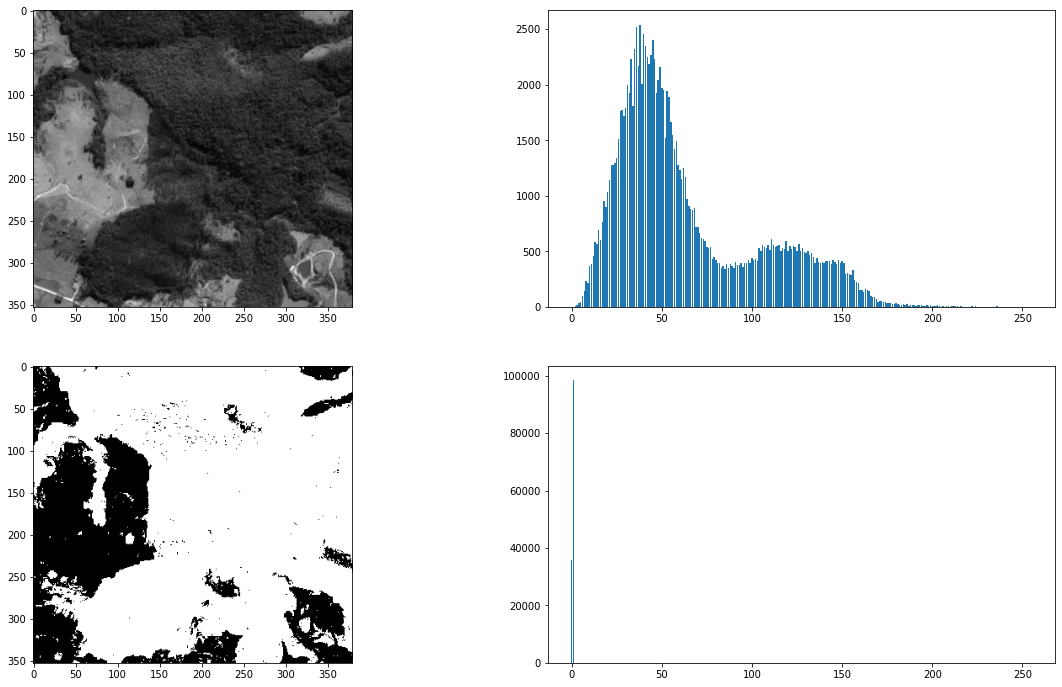

In [105]:

# 1. Compute histogram
hist, _ = np.histogram(img_orig_gs, bins=256, range=(0,256))

# 2. Compute threshold
ths = filters.threshold_otsu(img_orig_gs)
img_ths = img_orig_gs < ths
hist_ths, _ = np.histogram(img_ths, bins=256, range=(0,256))


plt.figure(figsize=(20, 12))
plt.subplot(221); plt.imshow(img_orig_gs, cmap='gray')
plt.subplot(222); plt.bar(np.arange(0,256), hist)

plt.subplot(223); plt.imshow(img_ths, cmap='gray')
plt.subplot(224); plt.bar(np.arange(0,256), hist_ths)


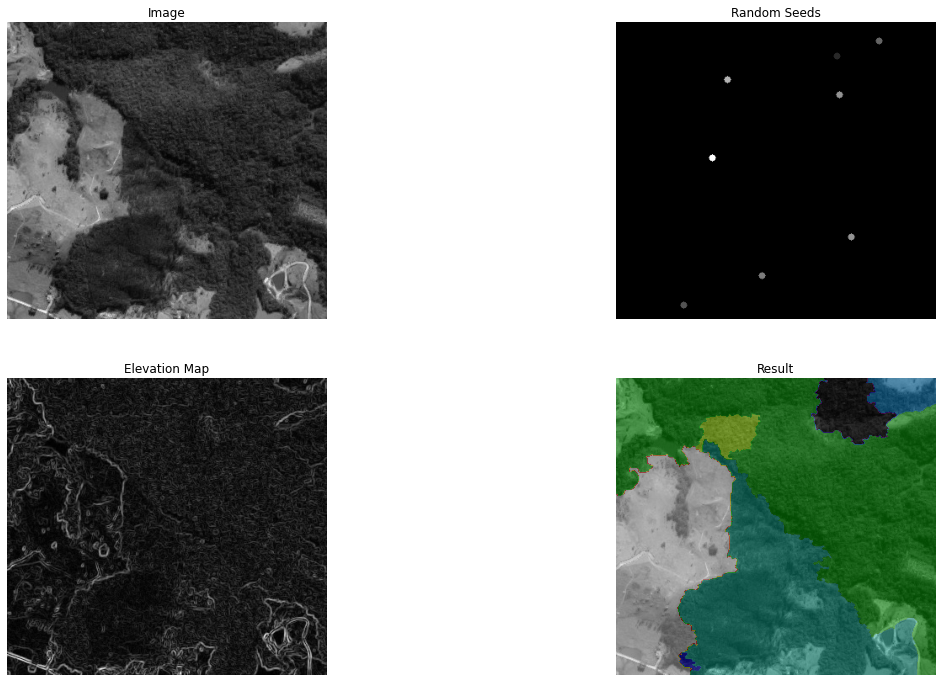

In [114]:
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import morphology


no_seeds = 8
random_seeds = np.zeros(img_orig_gs.shape)

indices = np.random.randint(0, img_orig_gs.shape, [no_seeds, 2])


random_seeds[indices[:, 0], indices[:, 1]] = img_orig_gs[indices[:, 0], indices[:, 1]]

random_seeds = morphology.dilation(random_seeds, morphology.disk(4)).astype(np.uint8) 

elevation_map = sobel(img_orig_gs)
segmentation = watershed(elevation_map, random_seeds)
# segmentation = normalize(segmentation, 0, 255).astype(np.uint8)
# print(segmentation)

elev_ths, _ = np.histogram(elevation_map, bins=256, range=(0,256))
seg_ths, _ = np.histogram(segmentation, bins=256, range=(0,256))
rand_ths, _ = np.histogram(random_seeds, bins=256, range=(0,256))

fig, axes = plt.subplots(2,2, figsize=(20, 12), sharex=True, sharey=True)
ax = axes.ravel()


axes[0, 0].imshow(img_orig_gs, cmap='gray'); axes[0, 0].axis('off'); axes[0,0].set_title('Image')
# axes[0, 1].bar(np.arange(0,256), hist)

axes[0, 1].imshow(random_seeds, cmap='gray'); axes[0, 1].axis('off'); axes[0,1].set_title('Random Seeds')
# axes[1, 1].bar(np.arange(0,256), hist)

axes[1, 0].imshow(elevation_map, cmap='gray'); axes[1, 0].axis('off'); axes[1,0].set_title('Elevation Map')
# axes[2, 1].bar(np.arange(0,256), elev_ths)

axes[1, 1].imshow(img_orig_gs, cmap='gray'); axes[1, 1].axis('off'); axes[1,1].set_title('Result')
axes[1, 1].imshow(segmentation, cmap=plt.cm.nipy_spectral, alpha=0.4)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)


In [8]:
image = data.coins()

elevation_map = sobel(image)
markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]

Text(0.5, 1.0, 'Elevation Map')

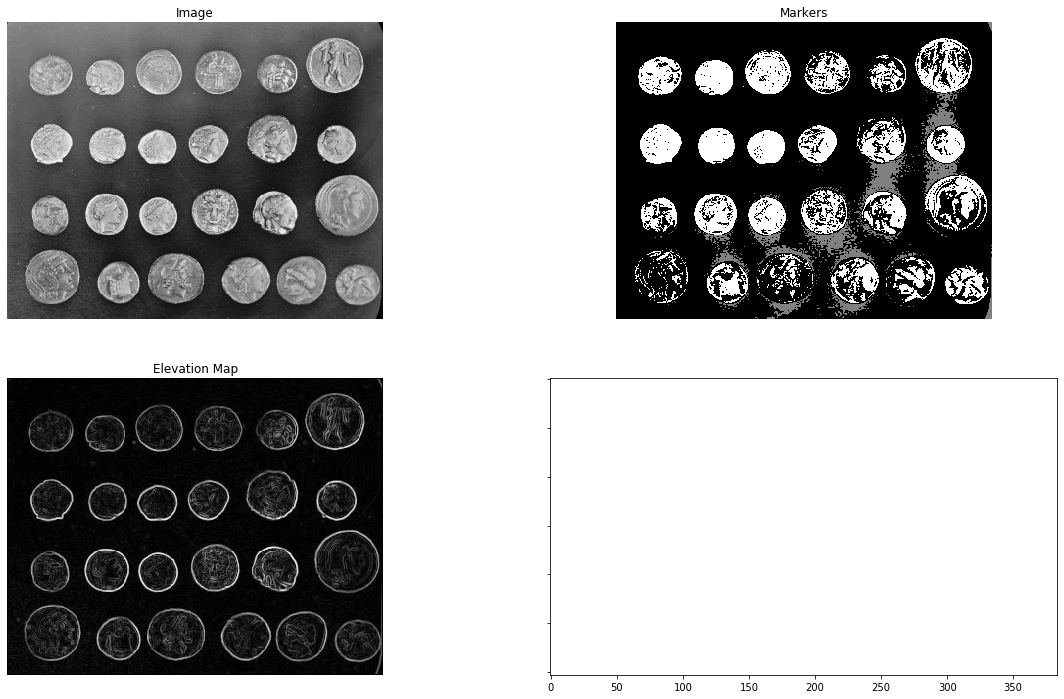

In [9]:
g, axes = plt.subplots(2,2, figsize=(20, 12), sharex=True, sharey=True)
ax = axes.ravel()


axes[0, 0].imshow(image, cmap='gray'); axes[0, 0].axis('off'); axes[0,0].set_title('Image')
# axes[0, 1].bar(np.arange(0,256), hist)

axes[0, 1].imshow(markers, cmap='gray'); axes[0, 1].axis('off'); axes[0,1].set_title('Markers')
# axes[1, 1].bar(np.arange(0,256), hist)

axes[1, 0].imshow(elevation_map, cmap='gray'); axes[1, 0].axis('off'); axes[1,0].set_title('Elevation Map')
# axes[2, 1].bar(np.arange(0,256), elev_ths)

#axes[1, 1].imshow(img_orig_gs, cmap='gray'); axes[1, 1].axis('off'); axes[1,1].set_title('Result')
#axes[1, 1].imshow(segmentation, cmap=plt.cm.nipy_spectral, alpha=0.4)

In [10]:
def normalize(matrix, start, end):
    return (matrix - matrix.min())/(matrix.max() - matrix.min()) * (end-start) + start

In [10]:
reference_name = 'paint_test.jpg'

img_orig = ref_image = io.imread(reference_name)
img_orig_gs = color.rgb2gray(img_orig)
img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

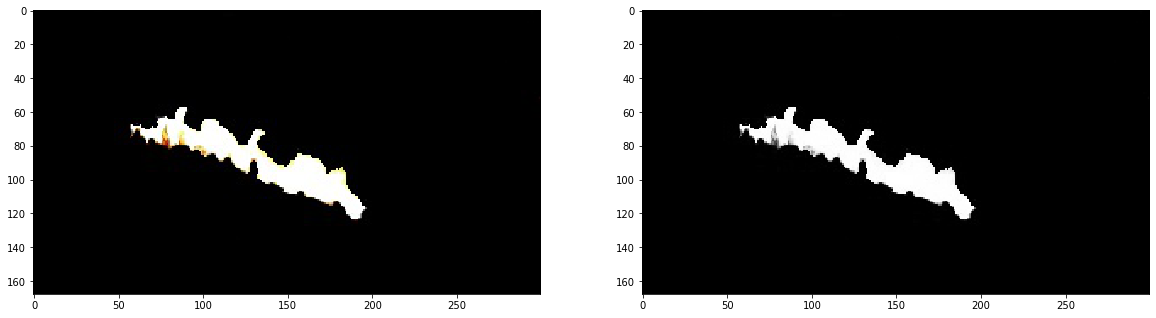

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img_orig)
plt.subplot(122)
plt.imshow(img_orig_gs, cmap='gray')

In [12]:
elevation_map = sobel(img_orig_gs)
markers = np.zeros_like(img_orig_gs)
markers[img_orig_gs < 100] = 1
markers[img_orig_gs > 100] = 2
im_true = watershed(elevation_map, markers)
im_true_bin = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]

In [75]:
ndi.label(ndi.binary_fill_holes(im_true - 1))

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2)

In [78]:
unique, counts = np.unique(im_true_bin, return_counts=True)
dict(zip(unique, counts))


{0: 48127, 1: 2272, 2: 1}

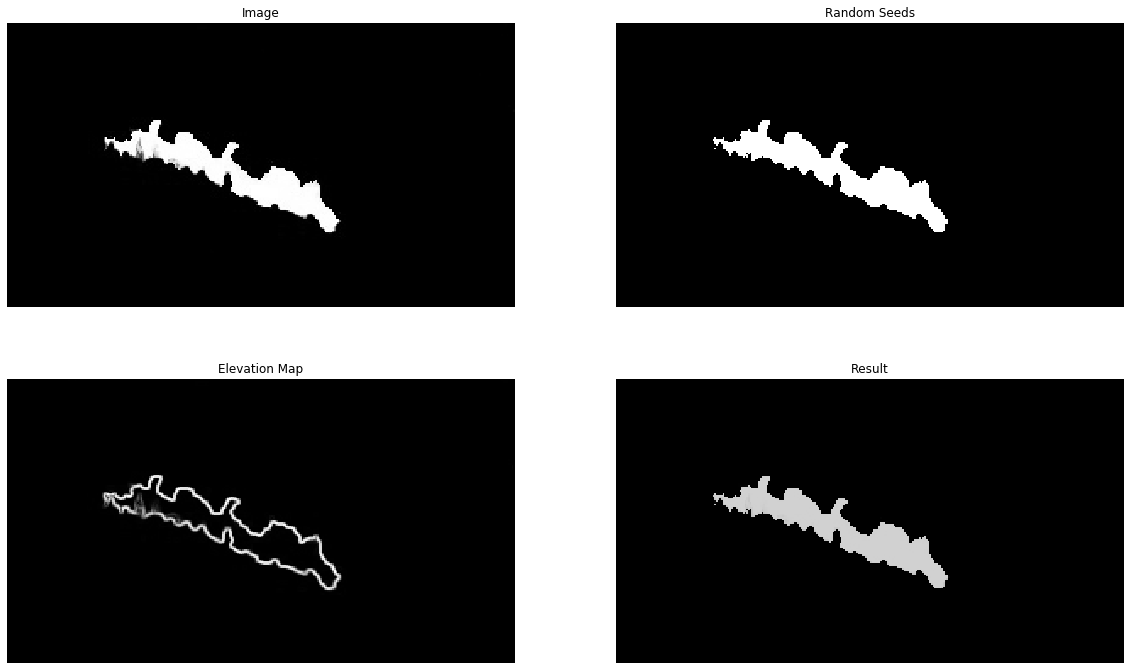

In [79]:
fig, axes = plt.subplots(2,2, figsize=(20, 12), sharex=True, sharey=True)
ax = axes.ravel()


axes[0, 0].imshow(img_orig_gs, cmap='gray'); axes[0, 0].axis('off'); axes[0,0].set_title('Image')
# axes[0, 1].bar(np.arange(0,256), hist)

axes[0, 1].imshow(markers, cmap='gray'); axes[0, 1].axis('off'); axes[0,1].set_title('Random Seeds')
# axes[1, 1].bar(np.arange(0,256), hist)

axes[1, 0].imshow(elevation_map, cmap='gray'); axes[1, 0].axis('off'); axes[1,0].set_title('Elevation Map')
# axes[2, 1].bar(np.arange(0,256), elev_ths)

axes[1, 1].imshow(img_orig_gs, cmap='gray'); axes[1, 1].axis('off'); axes[1,1].set_title('Result')
axes[1, 1].imshow(im_true, cmap=plt.cm.nipy_spectral, alpha=0.9)

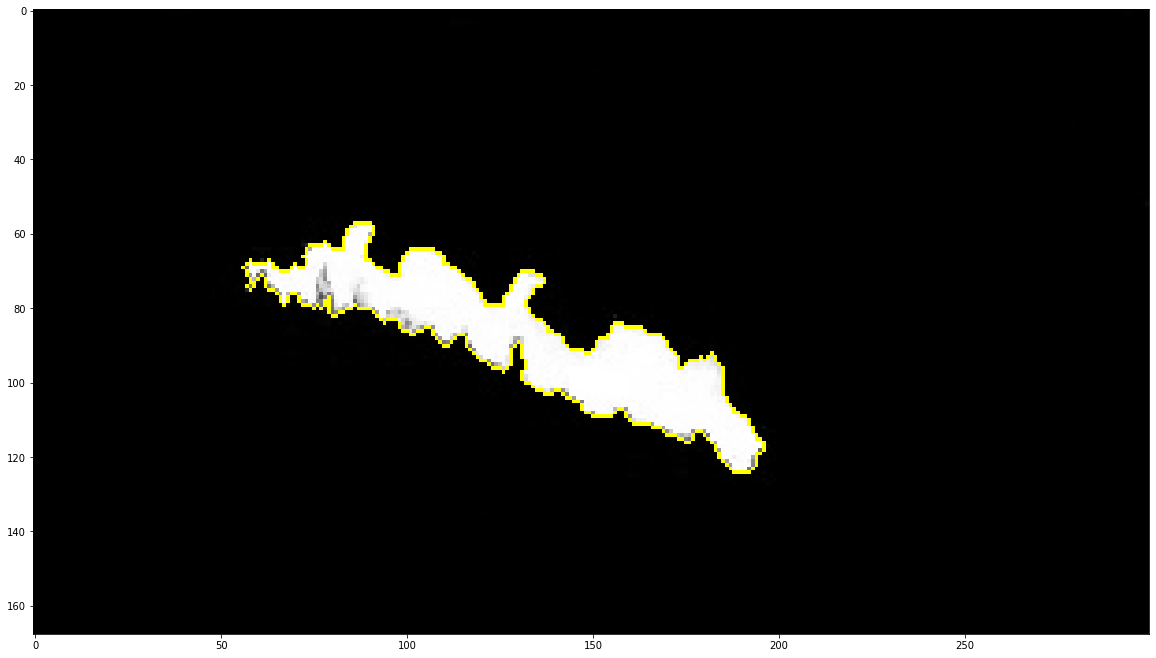

In [80]:
plt.figure(figsize=(20, 12))
plt.imshow(mark_boundaries(img_orig_gs, im_true_bin))
#plt.set_title('True Segmentation')
#plt.set_axis_off()

In [13]:
np.unique(im_true_bin)

array([0, 1, 2])

In [10]:
reference_name = '000.jpg'

teste = ref_image = io.imread(reference_name)
test_orig_gs = color.rgb2gray(img_orig)
#img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

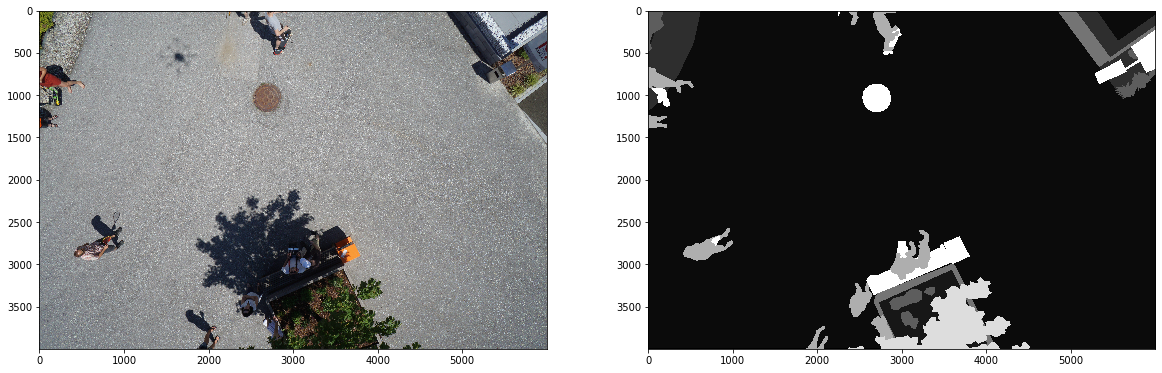

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(teste)
plt.subplot(122)
plt.imshow(test_orig_gs, cmap='gray')

In [4]:
label = '000_label.png'

img_orig = ref_image = io.imread(label)
img_orig_gs = color.rgb2gray(img_orig)
img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

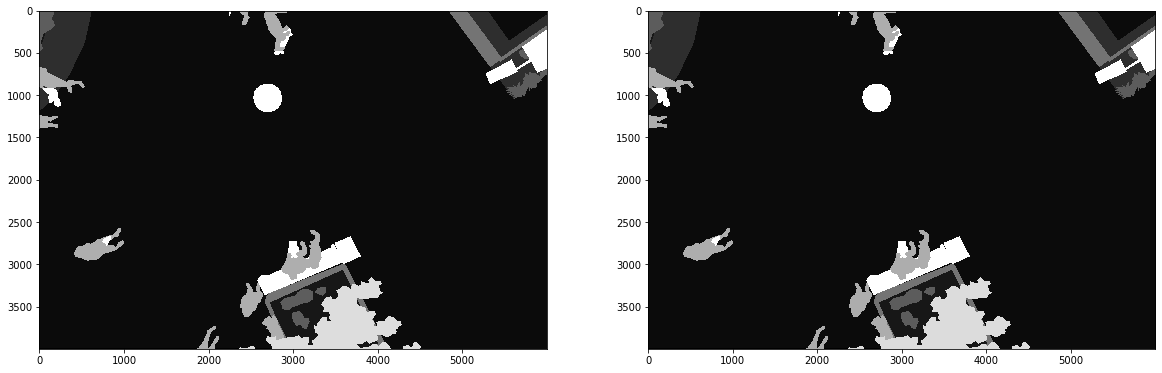

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img_orig, cmap='gray')
plt.subplot(122)
plt.imshow(img_orig_gs, cmap='gray')

In [7]:
np.unique(img_orig)

Array([ 0,  1,  2,  4,  8, 10, 15, 19, 22], dtype=uint8)

In [8]:
np.unique(img_orig_gs)

array([  0,  11,  23,  46,  92, 115, 173, 220, 255], dtype=uint8)

In [17]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.segmentation import watershed
#from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

In [18]:
image = img_as_ubyte(test_orig_gs)

# denoise image
denoised = rank.median(image, disk(2))

# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))

# process the watershed
labels = watershed(gradient, markers)


In [19]:
labels

array([[ 1,  1,  1, ...,  8,  8,  8],
       [ 1,  1,  1, ...,  8,  8,  8],
       [ 1,  1,  1, ...,  8,  8,  8],
       ...,
       [95, 95, 95, ..., 97, 97, 97],
       [95, 95, 95, ..., 97, 97, 97],
       [95, 95, 95, ..., 97, 97, 97]])

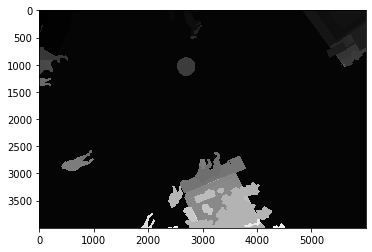

In [21]:
plt.imshow(labels, cmap =  'gray')

In [24]:
error, precision, recall = adapted_rand_error(img_orig, labels)
splits, merges = variation_of_information(img_orig, labels)

In [25]:
error

0.007883239524740238

In [26]:
precision

0.984422779091537

In [27]:
recall

0.9999319573891726

In [28]:
splits

0.26642971016306505

In [29]:
merges

0.00847585208325841

In [43]:
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic
slic = slic(teste, n_segments=7)

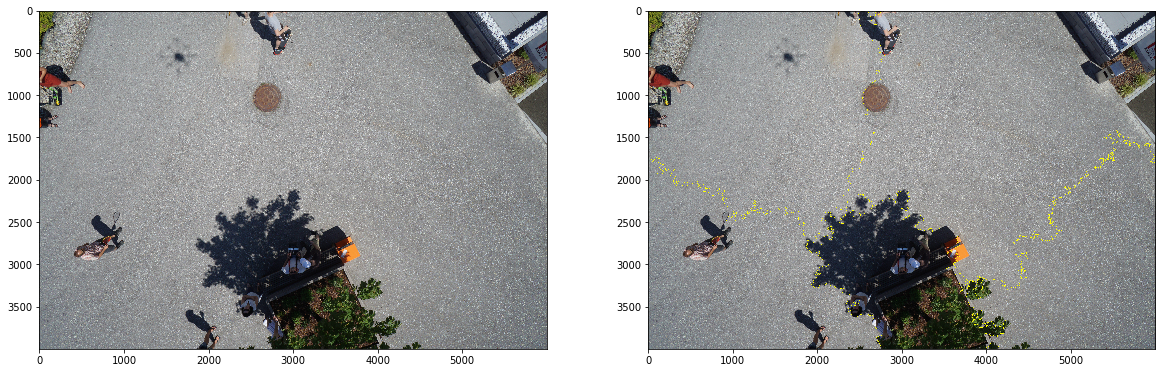

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(teste)
plt.subplot(122)
plt.imshow(mark_boundaries(teste, slic))

In [38]:
error, precision, recall = adapted_rand_error(test_orig_gs, slic)
splits, merges = variation_of_information(test_orig_gs, slic)

In [39]:
error

0.7191238904894623

In [40]:
precision

0.17109160477390542

In [41]:
recall

0.7838495751649074